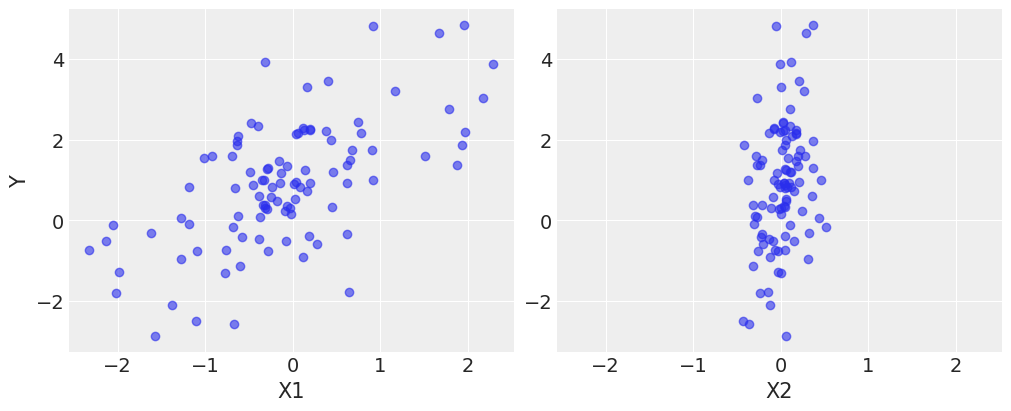

Running on PyMC3 v5.1.2


{'alpha': array(0.95724857),
 'beta': array([1.1007221 , 2.95116375]),
 'sigma_log__': array(0.03540319),
 'sigma': array(1.03603735)}

In [2]:

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
alpha, sigma = 1, 1
beta = [1, 2.5]
size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");
plt.show()

import pymc as pm
print(f"Running on PyMC3 v{pm.__version__}")
basic_model = pm.Model()
with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)
    mu = alpha + beta[0] * X1 + beta[1] * X2
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

map_estimate = pm.find_MAP(model=basic_model)
map_estimate


**NORMAL DISTRIBUTION EXAMPLE**

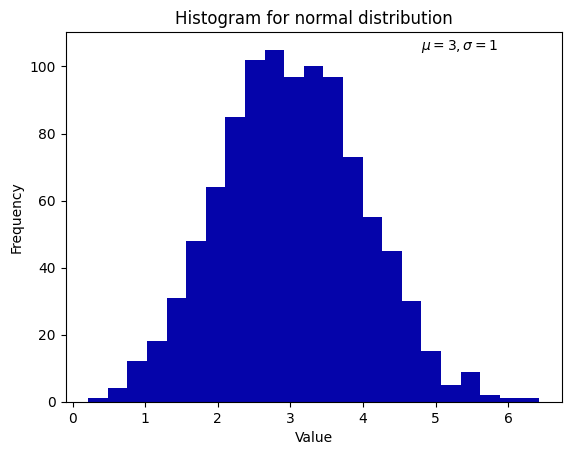

Help on class Model in module pymc.model:

class Model(pymc.util.WithMemoization)
 |  Model(*args, **kwargs)
 |  
 |  Encapsulates the variables and likelihood factors of a model.
 |  
 |  Model class can be used for creating class based models. To create
 |  a class based model you should inherit from :class:`~pymc.Model` and
 |  override the `__init__` method with arbitrary definitions (do not
 |  forget to call base class :meth:`pymc.Model.__init__` first).
 |  
 |  Parameters
 |  ----------
 |  name: str
 |      name that will be used as prefix for names of all random
 |      variables defined within model
 |  check_bounds: bool
 |      Ensure that input parameters to distributions are in a valid
 |      range. If your model is built in a way where you know your
 |      parameters can only take on valid values you can set this to
 |      False for increased speed. This should not be used if your model
 |      contains discrete variables.
 |  
 |  Examples
 |  --------
 |  How to de

/usr/local/lib/python3.10/dist-packages/pymc/step_methods/metropolis.py:284: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


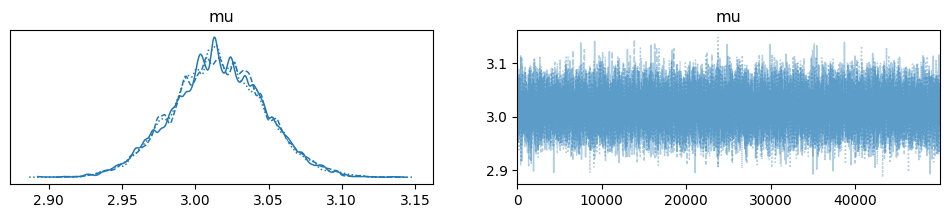

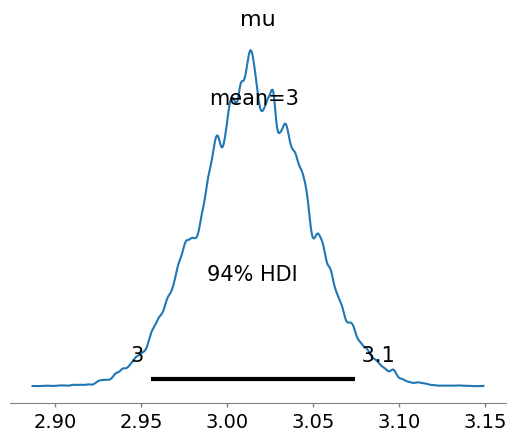

,mean,sd,hdi_3%,hdi_97%
mu,3.02,0.03,2.96,3.07


In [2]:
import scipy.stats as st
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

X = st.norm(loc=3, scale=1).rvs(size=1000)
X

plt.hist(x=X,bins='auto', color='#0504aa')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for normal distribution')
plt.text(4.8,105, r'$\mu=3, \sigma=1$')
plt.show()

help(pm.Model)
help(pm.summary)

with pm.Model() as model:
    prior = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=prior, sigma=1, observed=X)
    step = pm.Metropolis()
    trace = pm.sample(draws=50000, chains=3,step=step,return_inferencedata=True)  


pm.plot_trace(trace,show=True)
pm.plot_posterior(trace,show=True)


pm.summary(trace, round_to=2)
pm.summary(trace, round_to=2, kind="stats")


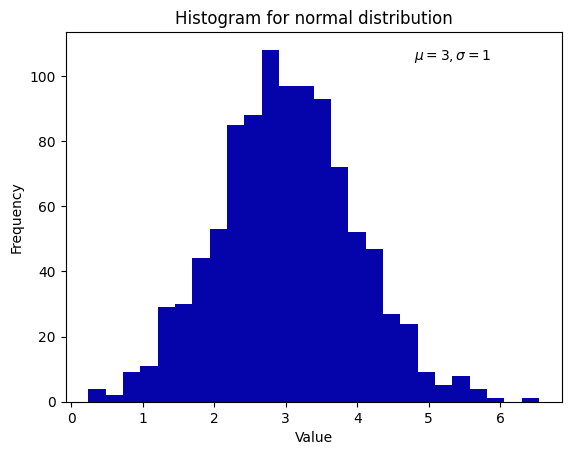

/usr/local/lib/python3.10/dist-packages/pymc/step_methods/metropolis.py:284: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


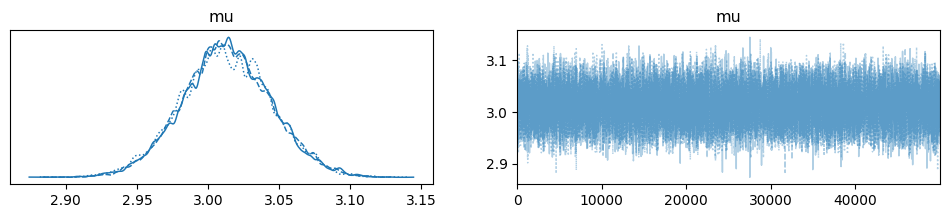

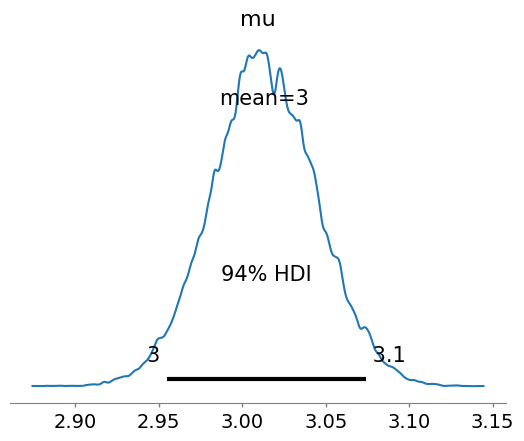

<Axes: title={'center': 'mu'}>

In [1]:
import scipy.stats as st
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated data
X = st.norm(loc=3, scale=1).rvs(size=1000)

# Plot histogram of simulated data
plt.hist(x=X, bins='auto', color='#0504aa')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for normal distribution')
plt.text(4.8, 105, r'$\mu=3, \sigma=1$')
plt.show()

# Fit Bayesian model
with pm.Model() as model:
    # Define prior distribution for the mean
    prior = pm.Normal('mu', mu=0, sigma=1)
    
    # Define likelihood function for the observed data
    obs = pm.Normal('obs', mu=prior, sigma=1, observed=X)
    
    # Define the algorithm to fit the model
    step = pm.Metropolis()
    
    # Sample from the posterior distribution using the Metropolis-Hastings algorithm
    trace = pm.sample(draws=50000, chains=3, step=step, return_inferencedata=True)

# Plot trace of posterior distribution
pm.plot_trace(trace, show=True)

# Plot posterior distribution of the mean
pm.plot_posterior(trace, show=True)


In [2]:
pm.summary(trace, round_to=2)
pm.summary(trace, round_to=2, kind="stats")


,mean,sd,hdi_3%,hdi_97%
mu,3.01,0.03,2.95,3.07


**BETA-BINOMIAL EXAMPLE**

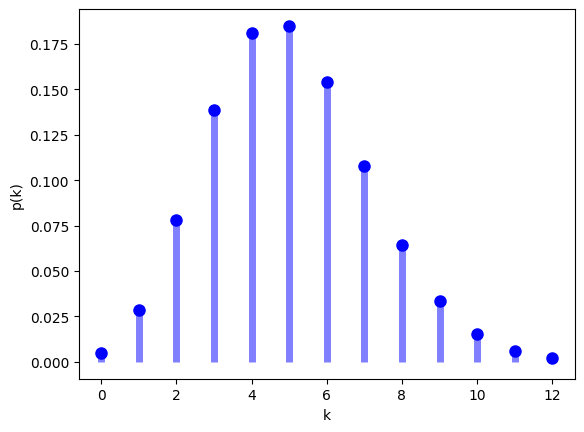

In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

def plot_binom(theta, n):
    p=theta
    binom = st.binom
    fig, ax = plt.subplots(1, 1)
    x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
    ax.set_xlabel("k")
    ax.set_ylabel("p(k)")
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plot_binom(theta=0.1, n=50)
plt.show()


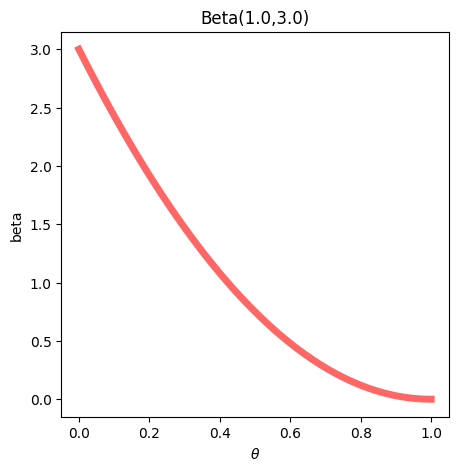

In [2]:
def plot_beta(alpha,beta):
    plt.figure(figsize=(5,5))
    plt.title("Beta(%0.1f,%0.1f)"%(alpha,beta))
    r = np.arange(0.,1.01,.01)
    plt.xlabel("$\\theta$")
    plt.ylabel("beta")
    plt.plot(r, st.beta.pdf(r, alpha, beta), 'r-', lw=5, alpha=0.6, label='beta pdf')

plot_beta(1,3)
plt.show()


Mounted at /content/drive


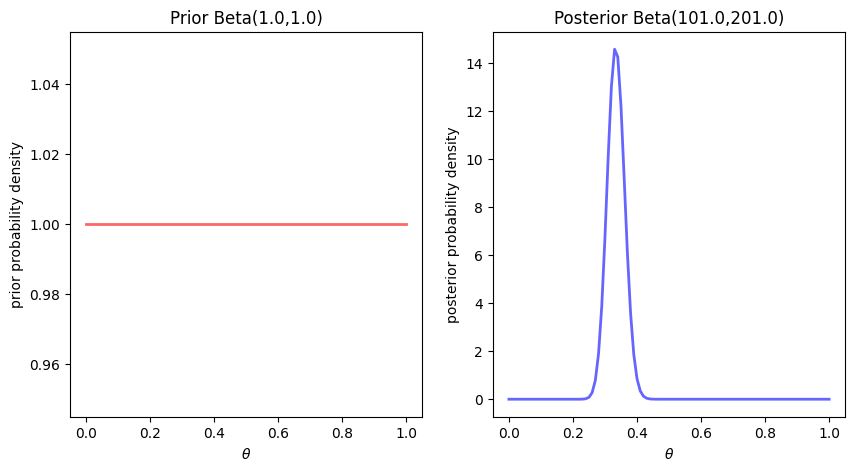

In [3]:
from google.colab import drive
drive.mount('/content/drive')

exec(open('beta_binomial_plot.py').read())
plot_prior_posterior_beta(alpha=1., beta=1., k=100, n=300)


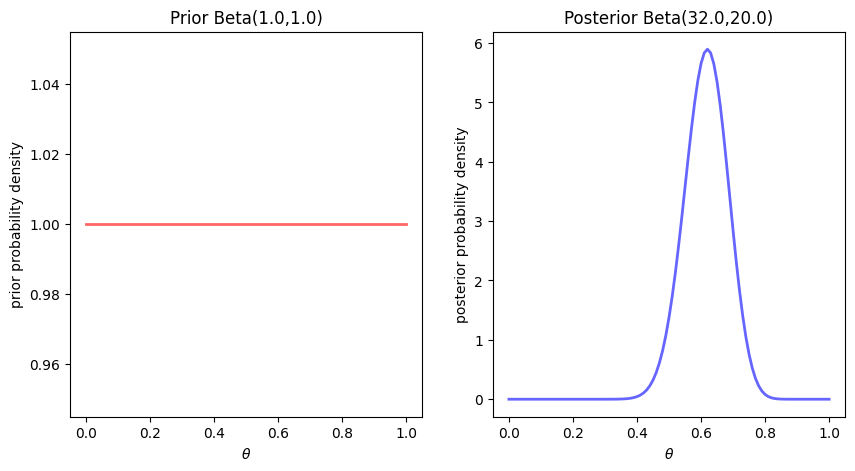

In [4]:
exec(open('beta_binomial_plot.py').read())
plot_prior_posterior_beta(alpha=1., beta=1., k=31, n=50)


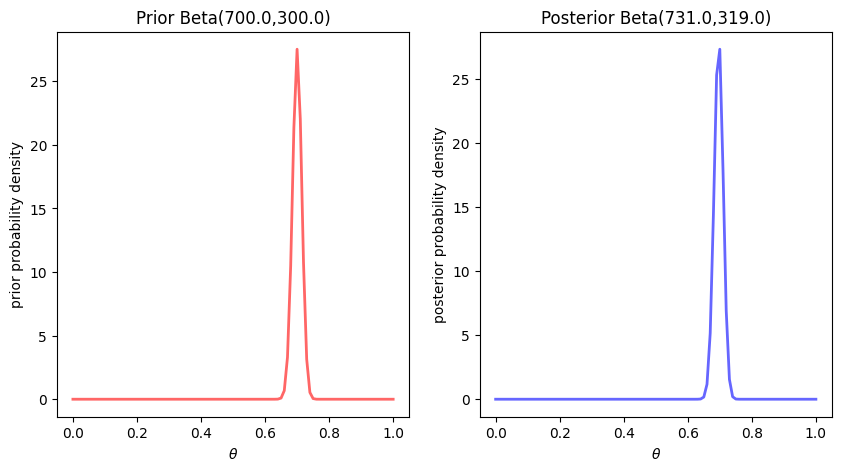

In [5]:
exec(open('beta_binomial_plot.py').read())
plot_prior_posterior_beta(alpha=700., beta=300., k=31, n=50)


In [6]:
theta = 0.3
n = 40
data = st.bernoulli.rvs(theta, size=n)
print ("Data:", data)
k = data.sum()


Data: [1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1
 0 1 0]


In [7]:
k

11

In [8]:
with pm.Model() as model:
     theta = pm.Beta('theta', alpha=1, beta=1)
     binomial = pm.Binomial('binomial', n, theta, observed=k)
     step = pm.Metropolis()
     trace = pm.sample(draws=10000, chains=3, step=step,return_inferencedata=True)


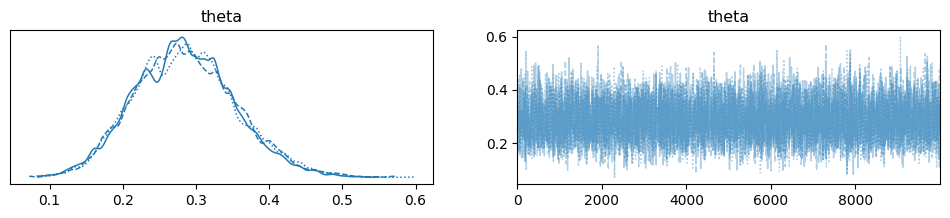

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

In [9]:
pm.plot_trace(trace,show=True)

In [10]:
pm.summary(trace, round_to=2, kind="stats")

,mean,sd,hdi_3%,hdi_97%
theta,0.29,0.07,0.15,0.41


In [11]:
data2 = np.array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [16]:
n = data2.shape[0]
k = data2.sum()

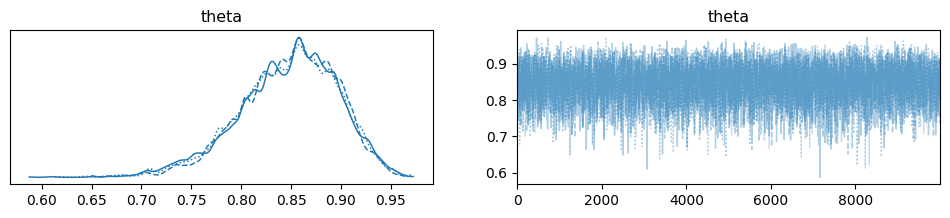

<xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    theta    (hdi) float64 0.7489 0.9372

In [17]:
with pm.Model() as model:
     theta = pm.Beta('theta', alpha=1, beta=1)
     binomial = pm.Binomial('binomial', n, theta, observed=k)
     step = pm.Metropolis()
     trace = pm.sample(draws=10000, chains=3, step=step,return_inferencedata=True)

pm.plot_trace(trace,show=True)

pm.summary(trace, round_to=2, kind="stats")
pm.hdi(trace,hdi_prob=.95)


In [18]:
pm.hdi(trace,hdi_prob=.95)

<xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    theta    (hdi) float64 0.7489 0.9372